## CS4243 Lab 1: Template Matching

**ASSIGNMENT SUBMISSION DEADLINE: Feb. 03, 23:59**

**Instructions:**
- See `lab1.pdf` and `lab1.py` for detailed descriptions.

- The functions to be implemented are given in `lab1.py`, with a description of each function. You will need to fill in the code where it is marked with the following:
    ```
    """ Your code starts here """

    """ Your code ends here """
    ```
- For open questions, write your answers directly into the notebook. 

- The test images are given in folder `data/input`.

- You are free to use NumPy functions, but you may not use `numpy.pad()` or other built-in functions of OpenCV aside from those already in the code template.


**Attention:**
- Please be careful about the data type of the image!
- Please use python with version >= 3.8.4, and install the libs provided in requirements.txt via `pip install -r requirements.txt`.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.
- Please do not change the input arguments of the functions in `lab1.py`, otherwise your implementation would fail to pass the test.
- Except for the input parameters of `non_maximum_suppression()`, please do not change other codes in this notebook.

**Submission instructions:**

After you finish the code and get all the results: 

- Re-run this notebook (and make sure you get all the clean outputs), 
    
- Zip the same folder back and name it with your student ID (e.g. A0123456H.zip or A0123456H_A2345678J.zip if you are a group of 2), and 
    
- Submit to the NUS Canvas system. Please be careful since any failure to follow the submission guideline will result in a grade deduction.
    
If you have any question regarding this lab, do not hesistate to ask questions under the Labs section on Canvas Discussions. You can also attend any lab slot for FAQs.

## Part 1: Image preprossessing (15%)

**Goal**: Implement following functions and then run the code cells below.
- `rgb2gray()`: **(5%)**
- `gray2grad()`: **(5%)**
- `pad_zeros()`: **(5%)**

Relative error of gray2grad() (<1e-8 will be fine): 0.0


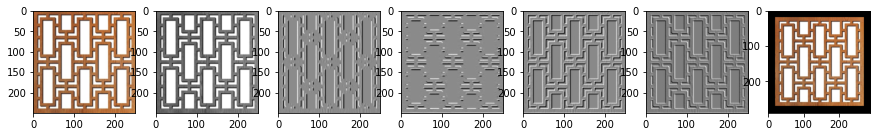

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'rectangular.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))

# RGB image to grayscale image
img_gray = lab1.rgb2gray(img)
# Grayscale image to gradient image
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
# Padding
img_pad = lab1.pad_zeros(img, 20, 20, 20, 20)

lab1.show_imgs([img, img_gray, img_grad_h, img_grad_v, img_grad_d1, img_grad_d2, img_pad])

# For evaluation purpose
sobelh = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]], dtype = float)
img_grad_h_cv2 = cv2.filter2D(img_gray.astype(float), -1, cv2.flip(sobelh, -1), borderType=cv2.BORDER_CONSTANT)
print('Relative error of gray2grad() (<1e-8 will be fine):', np.linalg.norm(img_grad_h - img_grad_h_cv2))

## Part 2: Normalized Cross-Correlation (30%)

**Goal**: Implement following functions and then run the code cells below.
- `normalized_cross_correlation()`: **(10%)**
- `normalized_cross_correlation_fast()`: **(10%)**
- `normalized_cross_correlation_matrix()`: **(10%)**

Runtime of normalized_cross_correlation(): 31.751714s
Runtime of normalized_cross_correlation_fast(): 0.744068s
Runtime of normalized_cross_correlation_matrix(): 0.474970s
Relative error of normalized_cross_correlation() (<1e-4 will be fine): 1.1909463827539862e-05
Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine): 1.1909463827539862e-05
Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine): 1.1909463827704466e-05


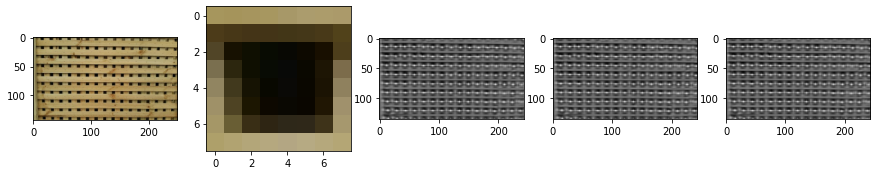

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'lattice.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5) # downsample the input image to save computation cost
template = img[14:22, 12:20]

t1 = time.time()
response = lab1.normalized_cross_correlation(img, template)
t2 = time.time()
response_fast = lab1.normalized_cross_correlation_fast(img, template)
t3 = time.time()
response_matrix = lab1.normalized_cross_correlation_matrix(img, template)
t4 = time.time()

print('Runtime of normalized_cross_correlation(): %fs'%(t2-t1))
print('Runtime of normalized_cross_correlation_fast(): %fs'%(t3-t2))
print('Runtime of normalized_cross_correlation_matrix(): %fs'%(t4-t3))


lab1.show_imgs([img, template, response, response_fast, response_matrix])

# For evaluation purpose
response_cv2 = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine):', np.linalg.norm(response_fast - response_cv2))
print('Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine):', np.linalg.norm(response_matrix - response_cv2))

## Part 3: Non-maximum Suppression (10%)

**Goal**: Implement following functions and then run the code cells below.
- `non_max_suppression()`

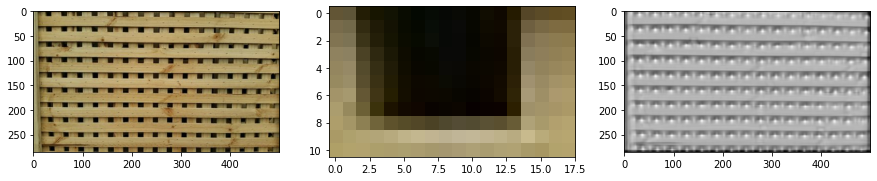

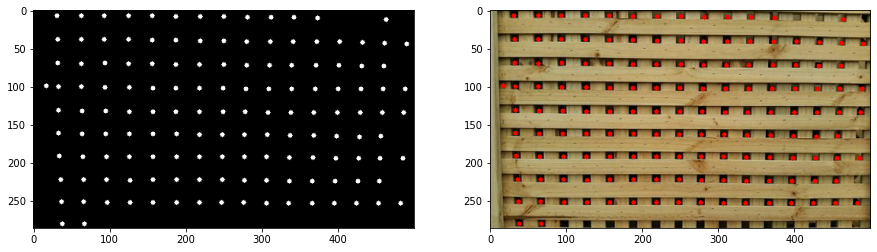

In [3]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'lattice.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[33:44, 24:42]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

# perform template matching
response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

## Part 4: Study on Template Matching (45%)

### 4.1 Image Inputs (5%)
No question in this part. You will get full marks if you achieve similar results.

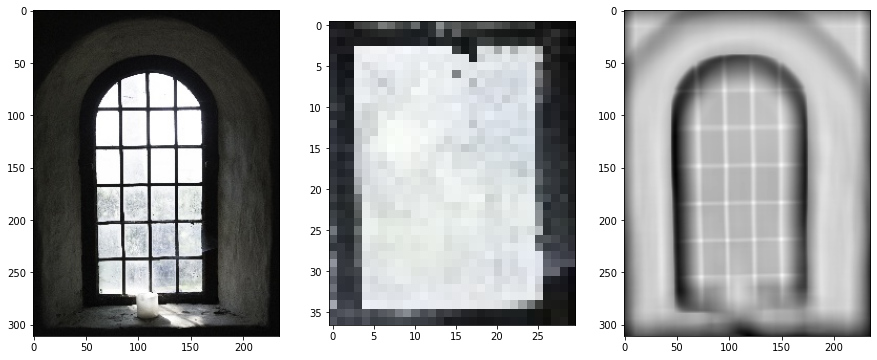

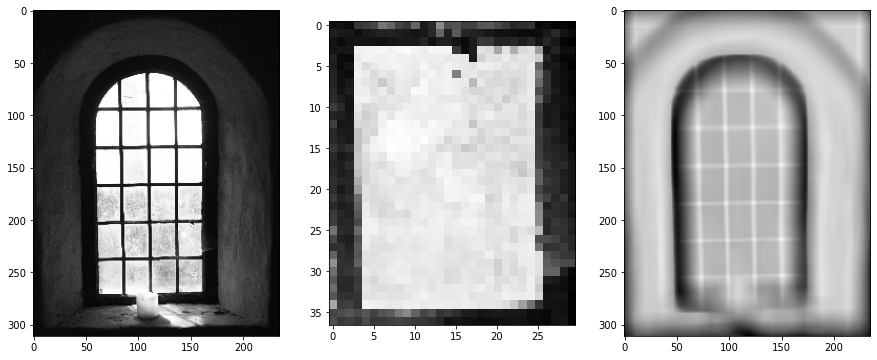

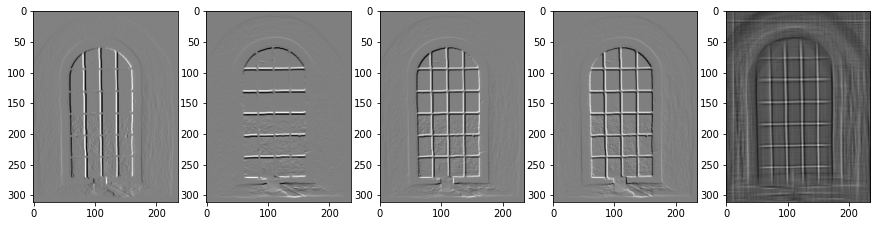

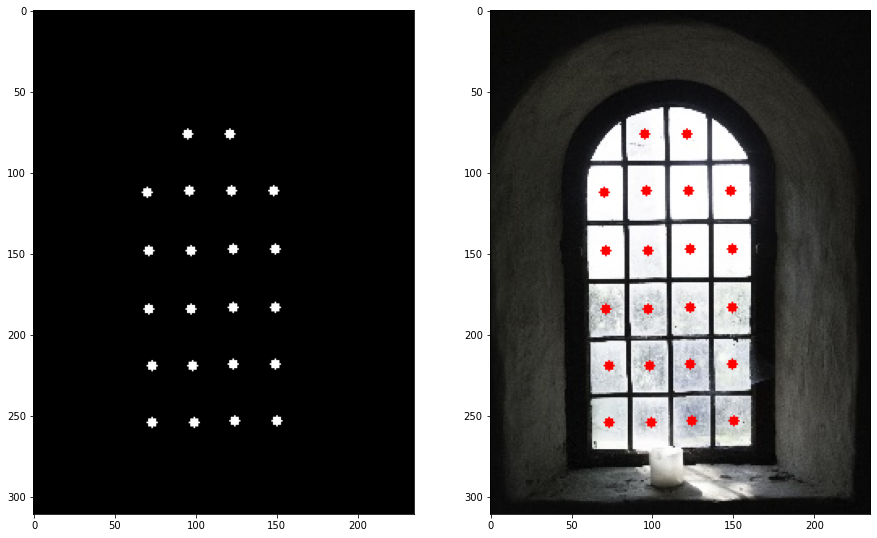

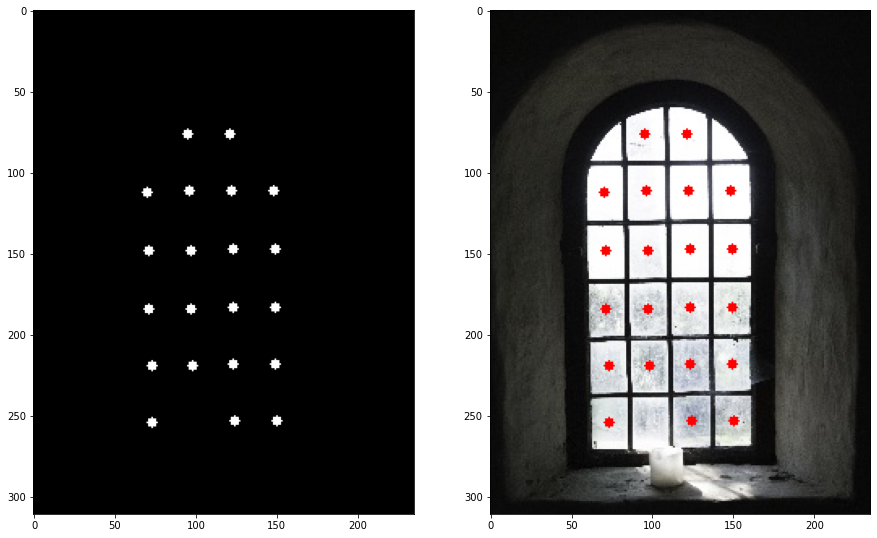

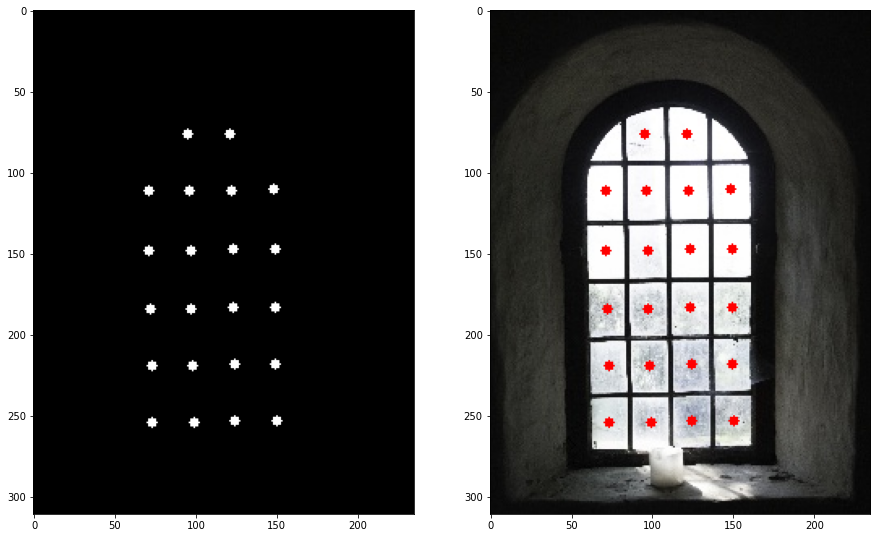

In [4]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'window.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
top, bottom, left, right = 200, 237, 135, 165
template = img[top:bottom, left:right]

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = lab1.rgb2gray(template)

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = img_gray[top:bottom, left:right]

# RGB to gradient map
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
img_grad = np.stack([img_grad_h, img_grad_v, img_grad_d1, img_grad_d2], -1)
template_grad = img_grad[top:bottom, left:right]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_gray_pad = lab1.pad_zeros(img_gray, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_grad_pad = lab1.pad_zeros(img_grad, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_gray = lab1.normalized_cross_correlation_fast(img_gray_pad, template_gray)
response_grad = lab1.normalized_cross_correlation_fast(img_grad_pad, template_grad)



lab1.show_imgs([img, template, response])
lab1.show_imgs([img_gray, template_gray, response_gray])
lab1.show_imgs([img_grad[:,:,0], img_grad[:,:,1], img_grad[:,:,2], img_grad[:,:,3], response_grad])

# !!! Adjust the suppress range or threshold if you fail to detect 4x5 repetitive patterns in the image for RGB and grayscale inputs
res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.93)
lab1.show_img_with_points(res, img_ori=img)

res_gray = lab1.non_max_suppression(response_gray, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.94)
lab1.show_img_with_points(res_gray, img_ori=img)

res_grad = lab1.non_max_suppression(response_grad, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_points(res_grad, img_ori=img)

### 4.2 Template Inputs (6%)

**QUESTION**: Explain why their response positions are different. **(6%)**

**ANSWER**: Each template matches the input image at different locations. The templates used are also very distinct from each other. Thus, when performing normalized cross correlation, the highest values are obtained at different locations, giving rise to different response positions.

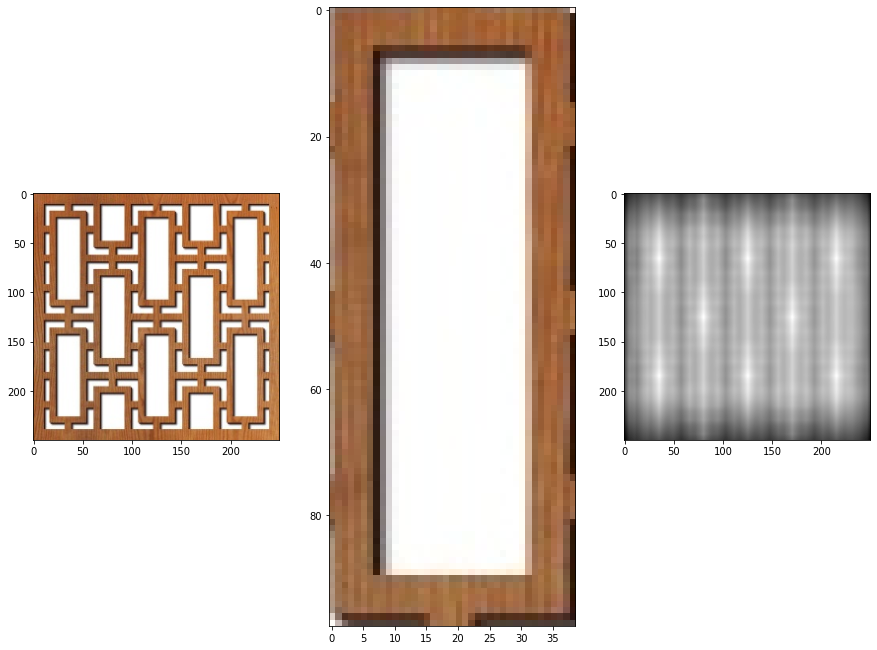

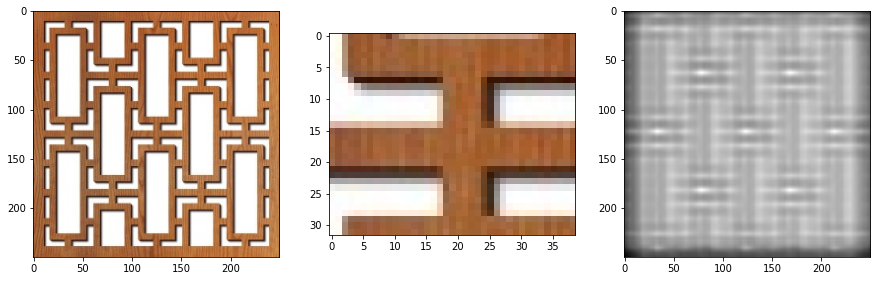

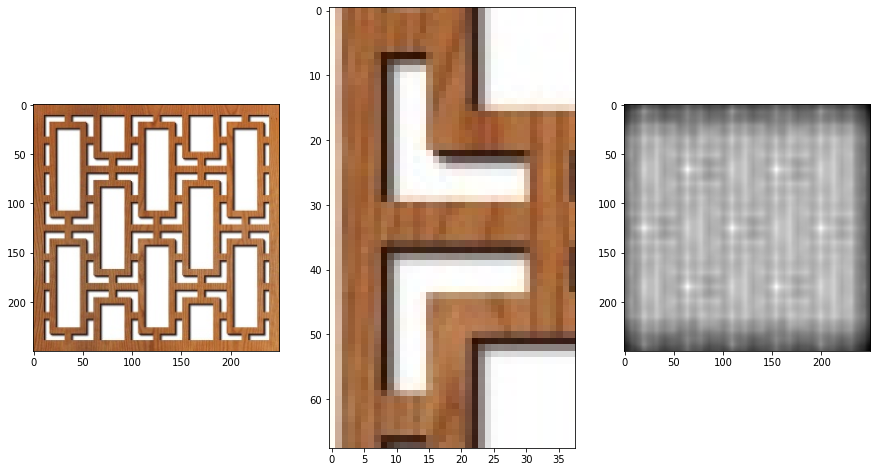

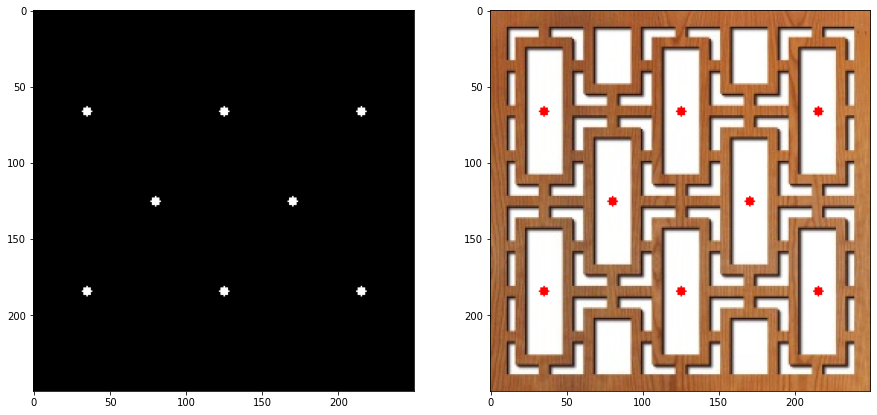

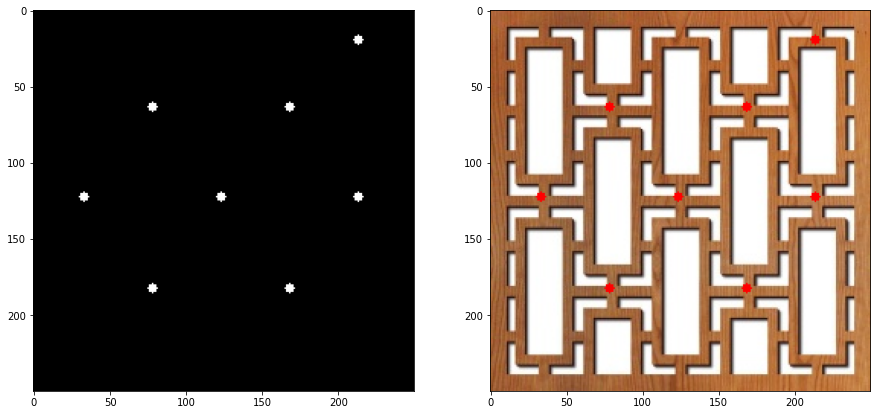

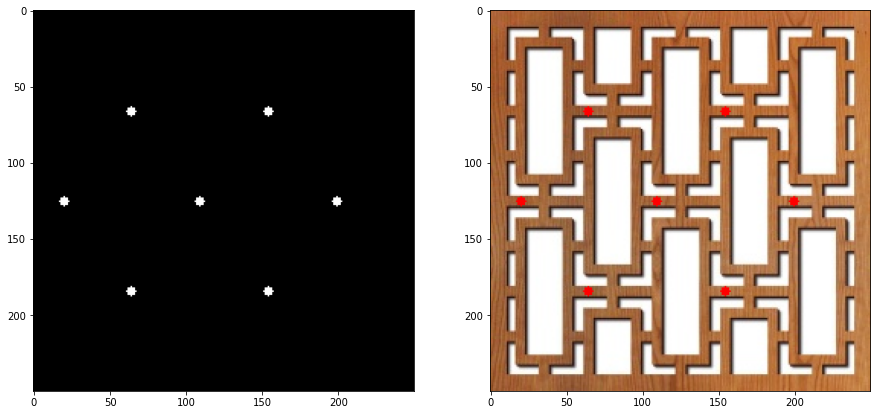

In [5]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)


data_dir = 'inputs'
filename = 'rectangular.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[77:175, 61:100]
template2 = img[48:80, 59:98]
template3 = img[92:160, 91:129]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)


# pad zeros to the image
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)


# pad zeros to the image
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

lab1.show_imgs([img, template, response])
lab1.show_imgs([img, template2, response2])
lab1.show_imgs([img, template3, response3])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res3, img_ori=img)

### 4.3 Template Size (6%）

**QUESTION**: How can each of these templates to detect every hole present in the input image? **(2%)**

**ANSWER**:  The 1x1 template matches with every hole present in the input image. Each of the larger templates, e.g. 1x3, 3x1, 3x3, contain 1x1 holes spaced evenly apart. Furthermore, the number of holes both horizontally and vertically are odd, which means that the maxima would coincide with the centre hole of the window. For example, when the 1x3 template is matched against the input image, a local maximum would be found at the centre hole of each matching window in the input image. This indicates that there are probably three 1x1 holes in the window.


**QUESTION**: Analyze and explain the subtle differences in the output borders. **(2%)**

**ANSWER**: When using the 1x1 template, there is only a narrow dark border because the template is able to match each hole.

When using the 1x3 template, there is a thicker dark border at the sides because the local maxima coincides only with the centre hole of the 1x3 template. At the holes at the leftmost and rightmost columns of the image, no maxima is found, hence it appears darker there.

When using the 3x1 template, there is a thicker dark border at the top and bottom because the local maxima coincides only with the centre hole of the 3x1 template. At the holes at the topmost and bottommost rows of the image, no maxima is found, hence it appears darker there.

When using the 3x3 template, there is a thicker dark border at the top, bottom and sides because the local maxima coincides only with the centre hole of the 3x3 template. At the holes at the topmost row, bottommost row, leftmost column and rightmost column of the image, no maxima is found, hence it appears darker there. 


**QUESTION**: Describe the correlation output with templates with a 1x1.5 or a 1x2 array of holes. **(2%)**

**ANSWER**: The correlation output from normalized_cross_correlation_fast() for both templates shows a matrix of white spots surrounded by a dark border. When using a 1x2 array, there is a much thicker dark border on the rightmost column compared to when using a 1x1.5 array. This is because the 1x1.5 template is a closer match to the 1x1 hole than the 1x2 template, hence the holes on the rightmost column would have a higher normalized cross correlation value when using the 1x1.5 template, causing them to appear brighter in the correlation output.

From the non_max_suppression() output, we can see that the template matches is off-centre from the holes in the case of the 1x1.5 template and in between the holes in the 1x2 template, instead of being in the centre of the hole. This is because the number of consecutive holes in one row is not an odd number.

In the non_max_suppression() output, the local maxima are not found in a regular pattern unlike the other templates. Even after changing the threshold for non_max_suppression(), the pattern still appears irregular.

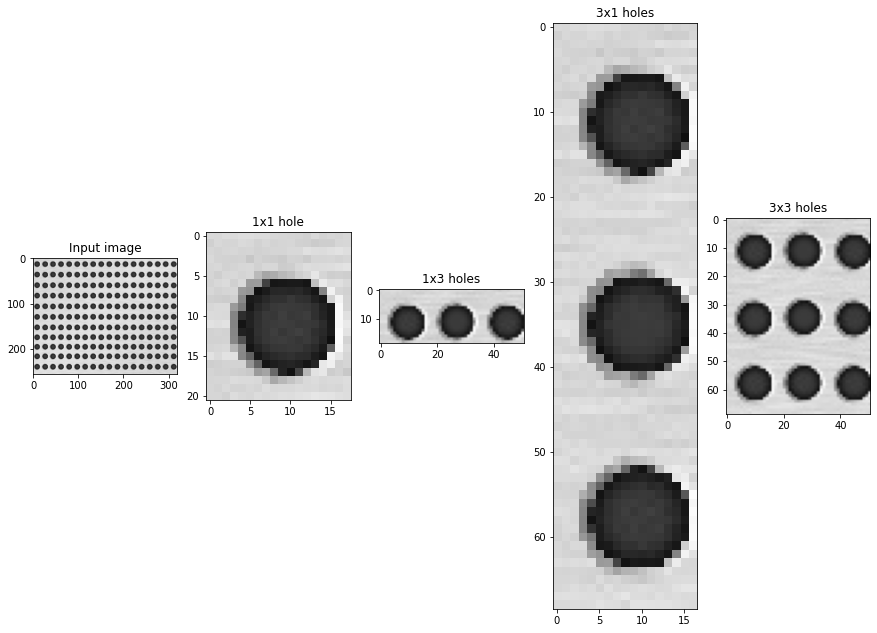

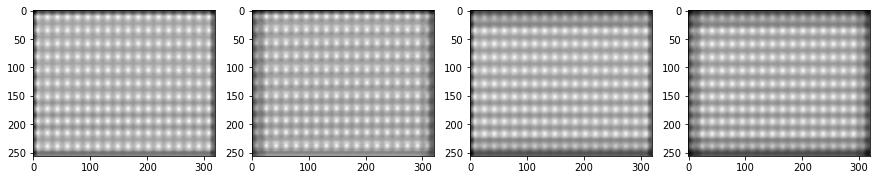

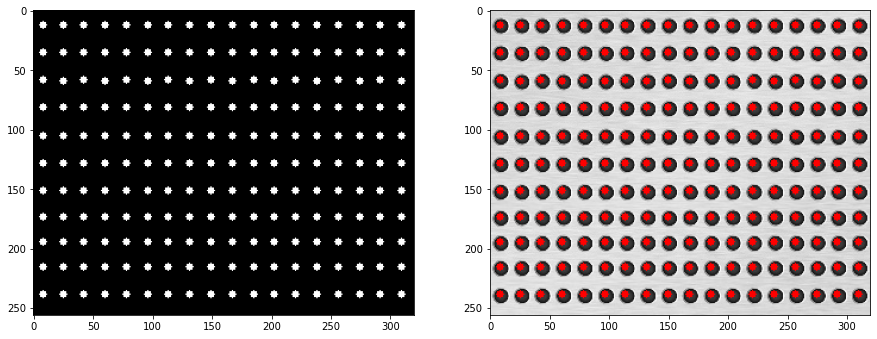

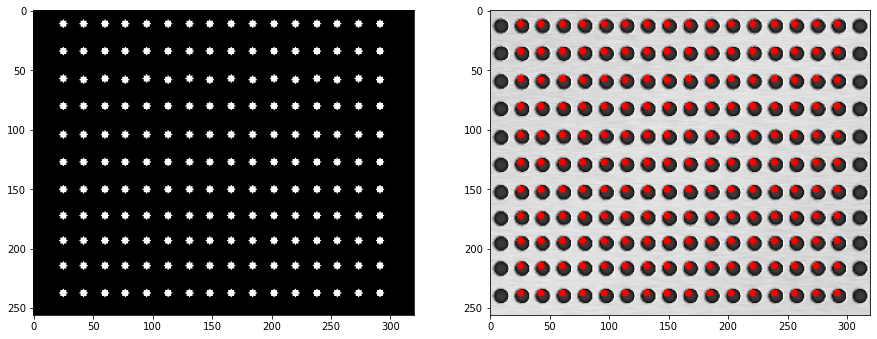

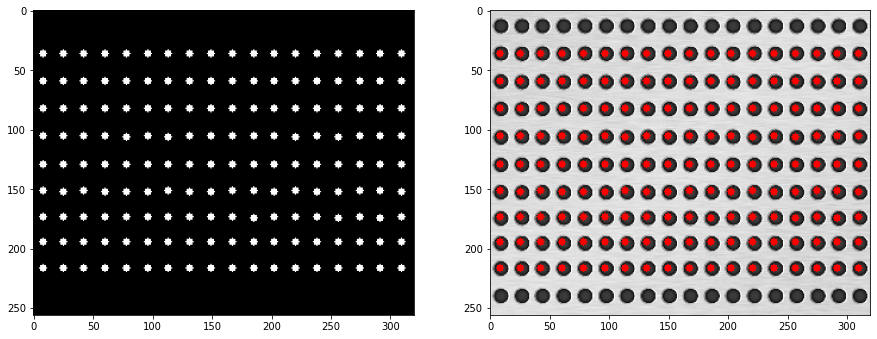

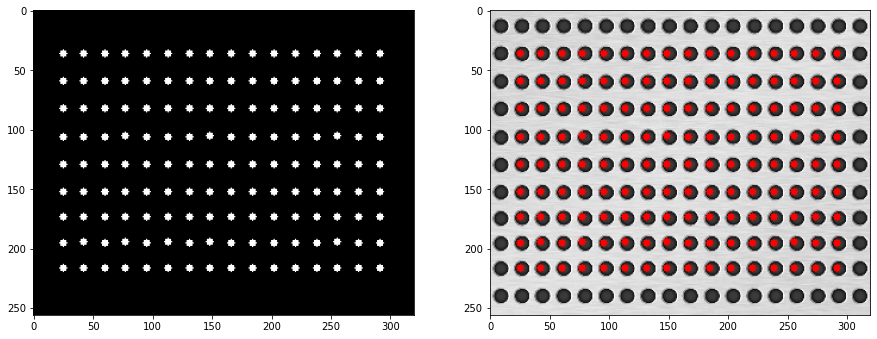

In [6]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import random
import lab1
importlib.reload(lab1)
random.seed(0)


data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[25:46, 17:35]
template2 = img[25:44, 17:68]
template3 = img[25:94, 17:34]
template4 = img[25:94, 17:68]


# Template 1x1
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response = lab1.normalized_cross_correlation_fast(img_pad, template)

# Template 1x3
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)

# Template 3x1
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

# Template 3x3
pad_height_bef, pad_height_aft = template4.shape[0] // 2 - (1 if template4.shape[0] % 2 == 0 else 0), template4.shape[0] // 2
pad_width_bef, pad_width_aft = template4.shape[1] // 2 - (1 if template4.shape[1] % 2 == 0 else 0), template4.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response4 = lab1.normalized_cross_correlation_fast(img_pad, template4)

lab1.show_imgs([img, template, template2, template3, template4], titles=['Input image', '1x1 hole', '1x3 holes', '3x1 holes', '3x3 holes'])
lab1.show_imgs([response, response2, response3, response4])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res3, img_ori=img)

res4 = lab1.non_max_suppression(response4, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res4, img_ori=img)

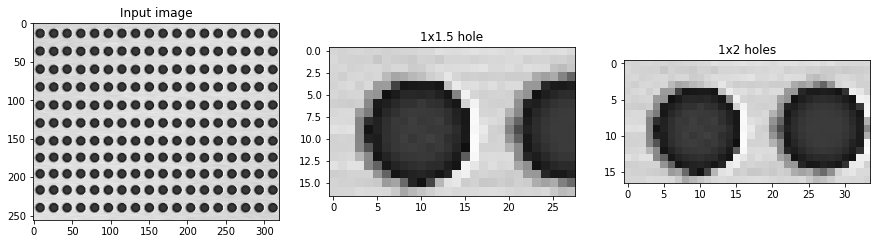

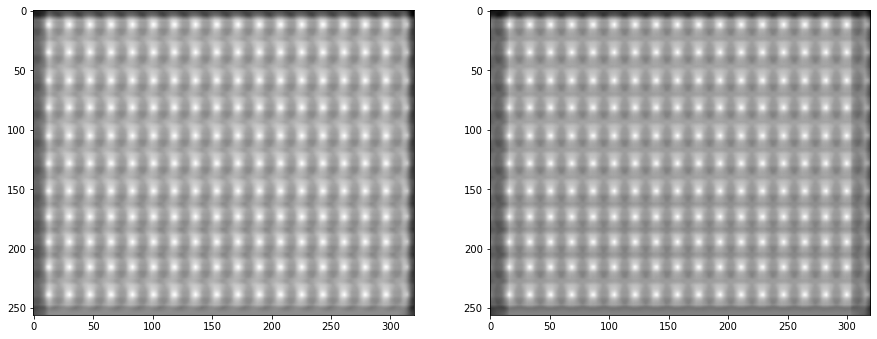

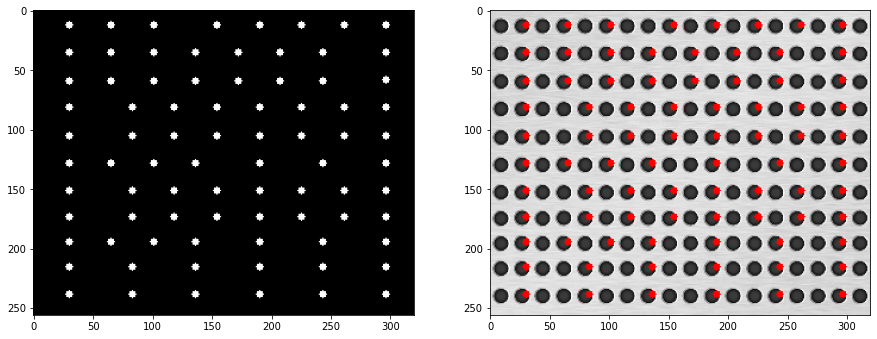

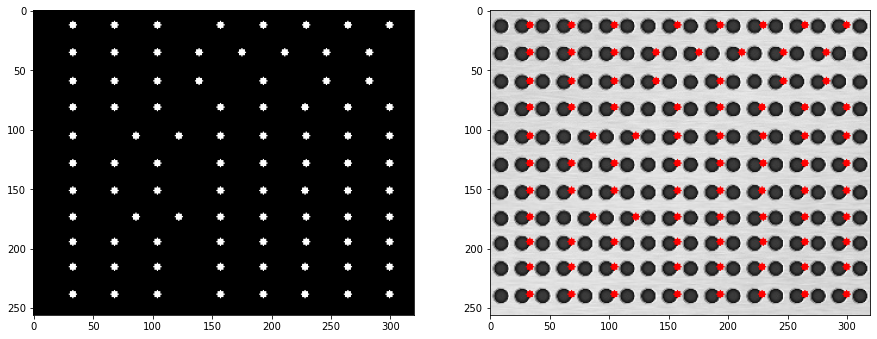

In [10]:
# 1x1.5 and 1x2 templates

import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import random
import lab1
importlib.reload(lab1)
random.seed(0)


data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[27:44, 17:45]
template2 = img[27:44, 17:51]


# Template 1x1.5
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response = lab1.normalized_cross_correlation_fast(img_pad, template)

# Template 1x2
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)

lab1.show_imgs([img, template, template2], titles=['Input image', '1x1.5 hole', '1x2 holes'])
lab1.show_imgs([response, response2])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res2, img_ori=img)

### 4.4 Mean-subtracted cross correlation (16%)

**Goal**: Implement following functions and then run the code cells below.
- `normalized_cross_correlation_ms()`: **(10%)**

**QUESTION**: What are the benefits of subtracting the mean? **(6%)**

**ANSWER**:  By subtracting the mean, the mean of the mean-subtracted template and the mean-subtracted input window become 0 since E[X-E[X]]=0. Values in the template and window that are less than the mean will become less than 0 after subtracting the mean. Upon performing normalized cross correlation, regions in the image that do not match the template will likely have a negative correlation value (causing them to be clipped to 0 when generating the output) or a small positive correlation value, hence those areas will appear darker. On the other hand, the regions in the image that match the template will likely have a relatively large positive correlation value, causing those areas to appear brighter. Hence, the contrast between the brighter and darker regions of the correlation output becomes more evident, making it easier to identify the maxima.

Relative error of normalized_cross_correlation() (<1e-4 will be fine): 2.8245270412412102e-05
Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine): 0.00014167735128169098


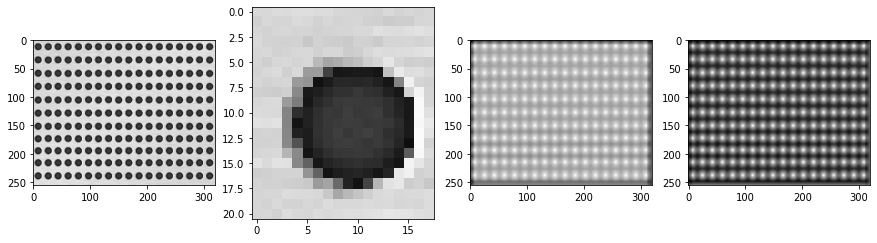

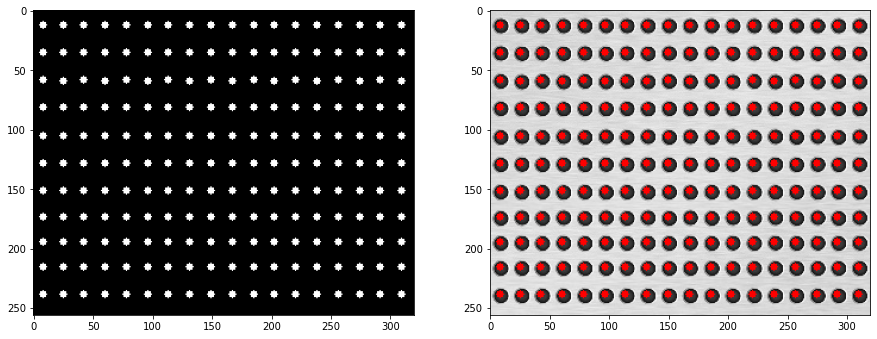

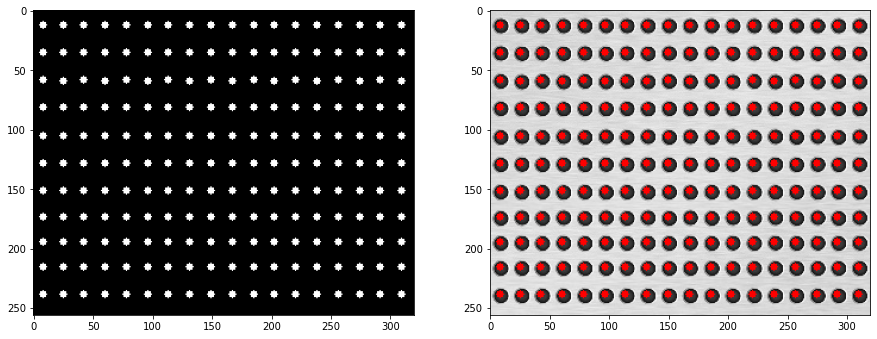

In [11]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[25:46, 17:35]


# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_ms = lab1.normalized_cross_correlation_ms(img_pad, template)

lab1.show_imgs([img, template, response, response_ms])

response_cv2 = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
response_cv2_ms = cv2.matchTemplate(img_pad, template, cv2.TM_CCOEFF_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine):', np.linalg.norm(response_ms - response_cv2_ms))

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)
res_ms = lab1.non_max_suppression(response_ms, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_points(res_ms, img_ori=img)

### 4.5 Auto-Correlation (6%)

**QUESTION**: Explain why the correlation output responses decrease as one gets further away from the center of the output. **(6%)**

**ANSWER**:  The template is essentially the input image itself. When the window is centred at a point further away from the center of the output, the area of overlapping region between the template and window decreases. This causes the normalized correlation value at those points to be smaller, resulting in a darker output.

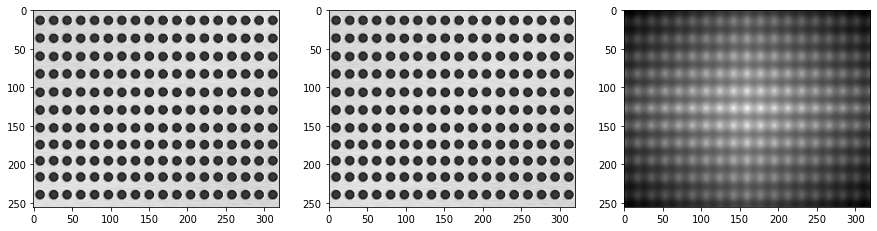

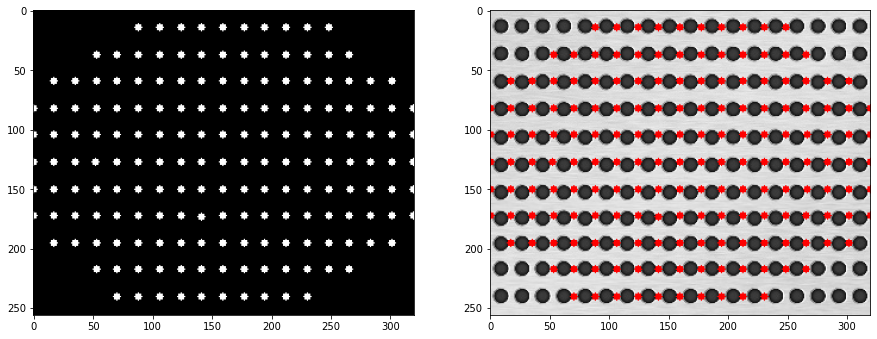

In [12]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img.copy()

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (13, 13), threshold=0.6)
lab1.show_img_with_points(res, img_ori=img)

### 4.6 Limitations (6%)

**QUESTION**: Observe the outputs and explain why template matching fails in certain regions of the image. **(6%)**

**ANSWER**: Template matching with normalized cross-correlation is not scale-invariant, rotational-invariant, nor intensity invariant. This means that changes in size, orientation or even color of the template or target objects will affect the algorithm's ability to detect the desired objects. Thus template matching fails in certain regions of the image here.

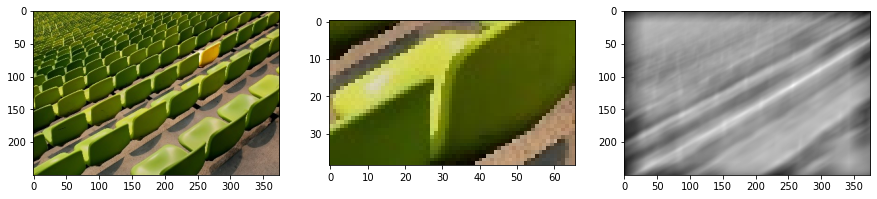

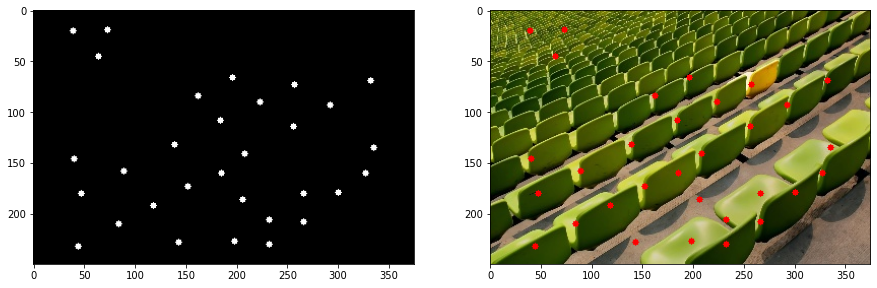

In [13]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'chairs.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[95:134, 224:290]
# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])


res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.5), int(template.shape[1] * 0.5)), threshold=0.8)
lab1.show_img_with_points(res, img_ori=img)


**Congrats! You have completed all tasks for lab 1.**